In [13]:
# Импорт основных библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Импорт библиотек для машинного обучения
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Настройка стиля графиков
sns.set(style='whitegrid')
%matplotlib inline


In [14]:
# Загрузка датасета "wine-quality-red" из OpenML
dataset = fetch_openml(name='wine-quality-red', version=1, as_frame=True)

# Разделение данных на признаки (X) и целевую переменную (y)
X = dataset.data
y = dataset.target

# Преобразование целевой переменной в числовой тип
y = y.astype(float)

# Просмотр первых пяти строк признаков
print("Первые 5 строк признаков (X):")
display(X.head())

# Просмотр первых пяти значений целевой переменной
print("\nПервые 5 значений целевой переменной (y):")
print(y.head())



Первые 5 строк признаков (X):


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4



Первые 5 значений целевой переменной (y):
0    5.0
1    5.0
2    5.0
3    6.0
4    5.0
Name: class, dtype: float64


In [15]:
# Проверка на пропущенные значения в признаках
print("Количество пропущенных значений в признаках (X):")
print(X.isnull().sum())

# Проверка на пропущенные значения в целевой переменной
print("\nКоличество пропущенных значений в целевой переменной (y):")
print(y.isnull().sum())


Количество пропущенных значений в признаках (X):
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

Количество пропущенных значений в целевой переменной (y):
0


In [16]:
# Инициализация стандартизатора
scaler = StandardScaler()

# Масштабирование признаков
X_scaled = scaler.fit_transform(X)

# Преобразование обратно в DataFrame для удобства
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Просмотр первых пяти строк масштабированных признаков
print("Признаки после масштабирования (первые 5 строк):")
display(X_scaled.head())


Признаки после масштабирования (первые 5 строк):


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [17]:
# Добавление столбца единиц для смещения (bias)
X_scaled['bias'] = 1

# Преобразование DataFrame в numpy массив
X_numpy = X_scaled.values
y_numpy = y.values.reshape(-1, 1)  # Преобразование y в столбец

print(f"Форма X после добавления bias: {X_numpy.shape}")
print(f"Форма y: {y_numpy.shape}")


Форма X после добавления bias: (1599, 12)
Форма y: (1599, 1)


In [18]:
# Разделение данных на обучающую и тестовую выборки (80% - обучение, 20% - тест)
X_train, X_test, y_train, y_test = train_test_split(X_numpy, y_numpy, test_size=0.2, random_state=42)

print(f"Форма обучающей выборки X_train: {X_train.shape}")
print(f"Форма тестовой выборки X_test: {X_test.shape}")
print(f"Форма обучающей выборки y_train: {y_train.shape}")
print(f"Форма тестовой выборки y_test: {y_test.shape}")


Форма обучающей выборки X_train: (1279, 12)
Форма тестовой выборки X_test: (320, 12)
Форма обучающей выборки y_train: (1279, 1)
Форма тестовой выборки y_test: (320, 1)


In [19]:
# Количество признаков (включая bias)
n_features = X_train.shape[1]

# Инициализация весов нулями
weights_manual = np.zeros((n_features, 1))

# Параметры градиентного спуска
learning_rate = 0.01
n_epochs = 1000
m_train = X_train.shape[0]

# Список для хранения истории потерь
loss_history = []


In [20]:
for epoch in range(n_epochs):
    # 1. Предсказание
    y_pred = np.dot(X_train, weights_manual)

    # 2. Вычисление ошибки
    error = y_train - y_pred

    # 3. Вычисление функции потерь (MSE)
    loss = (1/m_train) * np.sum(error ** 2)
    loss_history.append(loss)

    # 4. Вычисление градиентов
    gradients = (-2/m_train) * np.dot(X_train.T, error)

    # 5. Обновление весов
    weights_manual = weights_manual - learning_rate * gradients

    # 6. Вывод потерь каждые 100 эпох
    if (epoch + 1) % 100 == 0:
        print(f"Эпоха {epoch+1}, MSE: {loss:.4f}")


Эпоха 100, MSE: 1.0132
Эпоха 200, MSE: 0.4365
Эпоха 300, MSE: 0.4251
Эпоха 400, MSE: 0.4245
Эпоха 500, MSE: 0.4244
Эпоха 600, MSE: 0.4243
Эпоха 700, MSE: 0.4243
Эпоха 800, MSE: 0.4243
Эпоха 900, MSE: 0.4242
Эпоха 1000, MSE: 0.4242


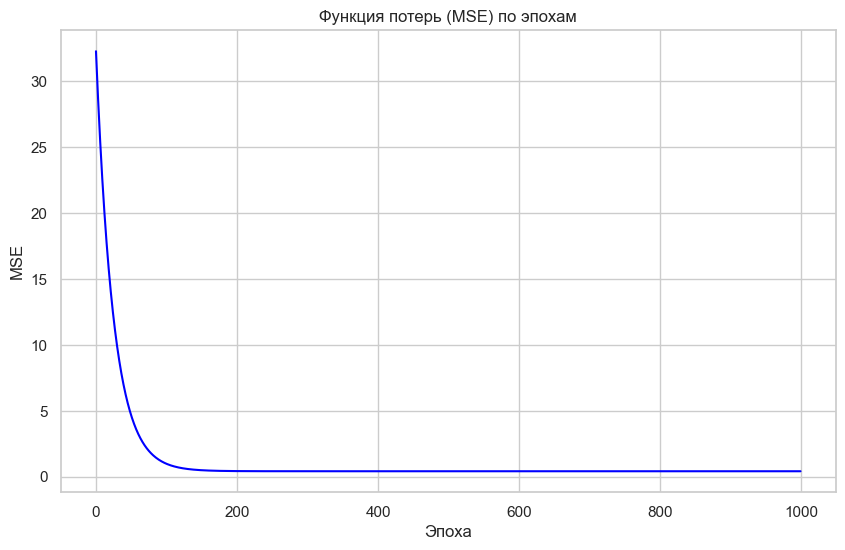

In [21]:
# Визуализация функции потерь (MSE) по эпохам
plt.figure(figsize=(10, 6))
plt.plot(range(n_epochs), loss_history, color='blue')
plt.title('Функция потерь (MSE) по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('MSE')
plt.grid(True)
plt.show()


In [22]:
# Предсказание на тестовой выборке
y_pred_manual = np.dot(X_test, weights_manual)

# Вычисление метрик
mse_manual = mean_squared_error(y_test, y_pred_manual)
r2_manual = r2_score(y_test, y_pred_manual)

print(f"Среднеквадратичная ошибка (MSE) ручной модели: {mse_manual:.4f}")
print(f"Коэффициент детерминации (R²) ручной модели: {r2_manual:.4f}")


Среднеквадратичная ошибка (MSE) ручной модели: 0.3899
Коэффициент детерминации (R²) ручной модели: 0.4034


In [23]:
# Инициализация модели линейной регрессии с отключённым встроенным смещением
model_sklearn = LinearRegression(fit_intercept=False)

# Обучение модели на обучающей выборке
model_sklearn.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_sklearn = model_sklearn.predict(X_test)

# Вычисление метрик
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print(f"Среднеквадратичная ошибка (MSE) модели scikit-learn: {mse_sklearn:.4f}")
print(f"Коэффициент детерминации (R²) модели scikit-learn: {r2_sklearn:.4f}")


Среднеквадратичная ошибка (MSE) модели scikit-learn: 0.3900
Коэффициент детерминации (R²) модели scikit-learn: 0.4032


In [24]:
# Извлечение коэффициентов модели
coefficients_sklearn = model_sklearn.coef_.flatten()

# Извлечение смещения (bias) модели
intercept_sklearn = model_sklearn.intercept_

# Проверка intercept (должен быть 0, так как fit_intercept=False)
print(f"Intercept модели scikit-learn: {intercept_sklearn:.4f}")  # Должен быть 0

# Форматирование уравнения гиперплоскости
features = list(X_scaled.columns)
equation_sklearn = "y = "
for i in range(len(coefficients_sklearn)):
    equation_sklearn += f"{coefficients_sklearn[i]:.4f} * {features[i]} + "
# Удаление последнего знака '+' и пробела
equation_sklearn = equation_sklearn.rstrip(' + ')

print(f"\nУравнение гиперплоскости, полученное с помощью scikit-learn:\n{equation_sklearn}")



Intercept модели scikit-learn: 0.0000

Уравнение гиперплоскости, полученное с помощью scikit-learn:
y = 0.0402 * fixed_acidity + -0.1792 * volatile_acidity + -0.0274 * citric_acid + 0.0093 * residual_sugar + -0.0850 * chlorides + 0.0588 * free_sulfur_dioxide + -0.1198 * total_sulfur_dioxide + -0.0195 * density + -0.0608 * pH + 0.1425 * sulphates + 0.3003 * alcohol + 5.6294 * bias


In [25]:
# Извлечение весов из ручной модели
weights_manual_flat = weights_manual.flatten()

# Извлечение весов из модели scikit-learn
weights_sklearn = coefficients_sklearn  # bias уже включён

# Вывод весов ручной модели
print("\nВесы модели, написанной своими руками:")
print(weights_manual_flat)

# Вывод весов модели scikit-learn
print("\nВесы модели scikit-learn:")
print(weights_sklearn)

# Вычисление разницы между весами
difference = weights_manual_flat - weights_sklearn
print("\nРазница между весами (ручная модель - scikit-learn):")
print(difference)



Весы модели, написанной своими руками:
[ 0.05419212 -0.17806764 -0.02709091  0.01390223 -0.08459376  0.05807435
 -0.1190977  -0.03350483 -0.05270263  0.14458101  0.2920557   5.62941499]

Весы модели scikit-learn:
[ 0.04018122 -0.1792372  -0.0274236   0.00925231 -0.08499703  0.05884439
 -0.11984784 -0.0195308  -0.06076105  0.14253987  0.30030663  5.62942467]

Разница между весами (ручная модель - scikit-learn):
[ 1.40109040e-02  1.16955804e-03  3.32688892e-04  4.64991899e-03
  4.03261807e-04 -7.70044015e-04  7.50140750e-04 -1.39740220e-02
  8.05842299e-03  2.04114508e-03 -8.25092744e-03 -9.68515681e-06]


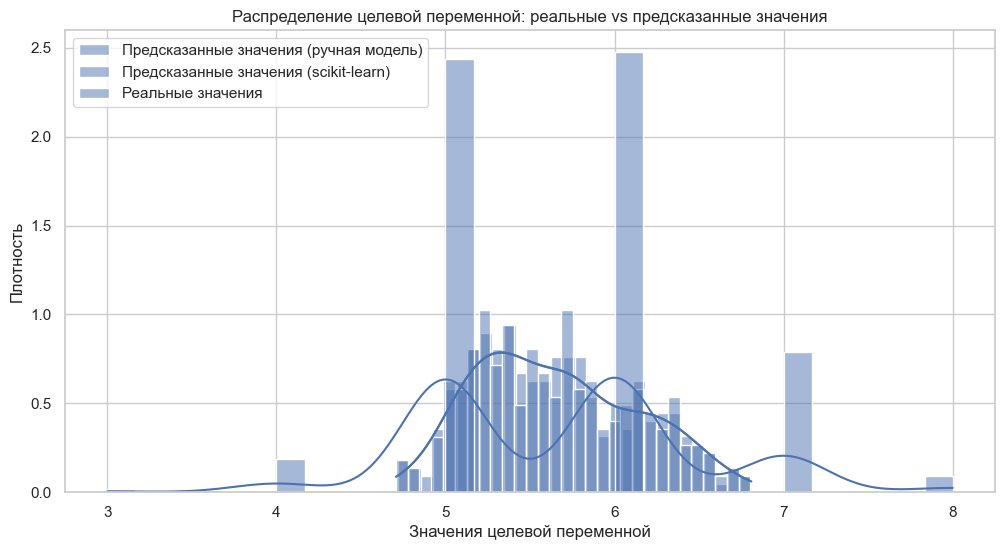

In [26]:
# Визуализация распределения предсказанных значений
plt.figure(figsize=(12, 6))

# Гистограмма предсказаний ручной модели
sns.histplot(y_pred_manual, bins=30, kde=True, color='salmon', label='Предсказанные значения (ручная модель)', stat="density")

# Гистограмма предсказаний scikit-learn модели
sns.histplot(y_pred_sklearn, bins=30, kde=True, color='green', label='Предсказанные значения (scikit-learn)', stat="density")

# Гистограмма реальных значений
sns.histplot(y_test, bins=30, kde=True, color='skyblue', label='Реальные значения', stat="density")

plt.title('Распределение целевой переменной: реальные vs предсказанные значения')
plt.xlabel('Значения целевой переменной')
plt.ylabel('Плотность')
plt.legend()
plt.show()


In [27]:
# Создание сводной таблицы метрик
metrics = pd.DataFrame({
    'Модель': ['Ручная модель', 'scikit-learn'],
    'MSE': [mse_manual, mse_sklearn],
    'R²': [r2_manual, r2_sklearn]
})

display(metrics)


,Модель,MSE,R²
0,Ручная модель,0.389855,0.403441
1,scikit-learn,0.390025,0.403180
